# Mod 5 Project - Capstone
   * Student name: THOMAS J WHIPPLE
   * Student pace: Part-time student
   * Scheduled project review date/time: FRIDAY, JULY 15, 2020, 10:00am
   * Instructor name: JEFF HERMAN 
   * Blog post URL:

How can I use data to improve my local ski mountain?

# Import Necessary Libraries

In [1]:
# Below are the libraries I will use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import folium


# Load the Data

I was given four datasets from Magic Mountain Resort. These are the Liftopia ski ticket data collected from the last four years, 2017 - 2020.

In [2]:
# Liftopia data from 2017
df_2017 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.16 to 4.9.17.csv")

In [3]:
# Liftopia data from 2018
df_2018 = pd.read_csv("Data_Folder/Online Liftopia Magic store Guest sales 10.1.17 to 4.8.18.csv")

In [4]:
# Liftopia data from 2019
df_2019 = pd.read_csv("Data_Folder/Online Liftopia Magic Store Guest sales 10.1.18 to 4.7.19.xls.csv")

In [5]:
# Liftopia data from 2020 - this data set has less since the resort closed early due to Covid-19
df_2020 = pd.read_csv("Data_Folder/Online Liftopia magic store Guests 10.1.19 to 3.15.20.csv")

In [6]:
# Put the four datasets into one dataframe
data = pd.concat([df_2017, df_2018, df_2019, df_2020], axis=0, sort=False)

In [7]:
data.reset_index(drop=True, inplace=True)

# EDA

In [8]:
# All the columns that don't have enough information - going to drop
guest_data = ['barcode', 'guest_birthdate', 'guest_height', 'guest_weight', 
              'guest_gender', 'guest_ability_level', 'guest_shoe_size',
              'guest_shoe_style', 'guest_shoe_type', 'guest_equipment_choice',
              'custom_field_question', 'custom_field_response']
df = data.drop(columns = guest_data, axis=0)                        

### Guest Data

In [15]:
data.guest_ability_level.value_counts()

Beginner                  646
Intermediate              541
Advanced                  120
Type I (Beginner)          34
Type II (Intermediate)     13
Type III (Advanced)         4
Name: guest_ability_level, dtype: int64

In [16]:
data.guest_equipment_choice.value_counts()

Skis                             1134
Snowboard: Left Foot Forward      143
Snowboard: Right Foot Forward      81
Name: guest_equipment_choice, dtype: int64

In [36]:
age = data.filter(['guest_birthdate', 'trip_date'], axis=1)

In [37]:
age['guest_birthdate'] = pd.to_datetime(age['guest_birthdate'])
age['trip_date'] = pd.to_datetime(age['trip_date'])

In [38]:
age = age.dropna()

In [41]:
age['years_old'] = (age['trip_date'] - age['guest_birthdate'])

In [42]:
age['years_old'] = age['years_old']/np.timedelta64(1,'Y')

In [60]:
age = age[age.years_old > 0] 

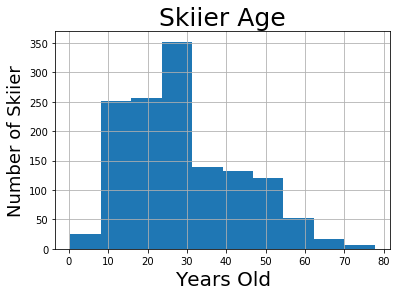

In [62]:
age.years_old.hist()
plt.ylabel("Number of Skiier",fontsize=18)
plt.xlabel("Years Old", fontsize=20)
plt.title('Skiier Age', fontsize=25)
plt.show()

### Country

In [65]:
# We don't need the USA twice!
df['purchaser_country'].replace(to_replace='United States', value='US', inplace=True)

In [66]:
# Get rid of everything that isn't USA
df = df[df['purchaser_country'] == 'US']

### Other Columns

In [68]:
# Since all are unique they don't seem important
df = df.drop(['ticket_id'], axis = 1)

### Product Types

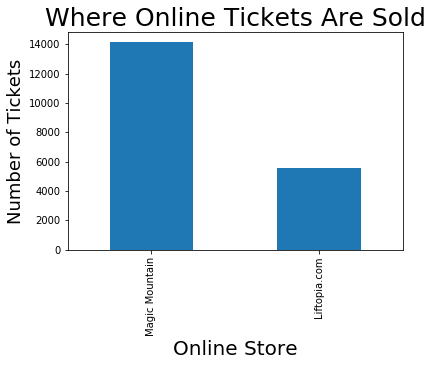

In [69]:
df['store'].value_counts().plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Online Store", fontsize=20)
plt.title('Where Online Tickets Are Sold', fontsize=25)
plt.show()
# Or like this:
#df.groupby('store').size().plot(kind='bar')

In [70]:
# Look at the different possible products
df['product'].value_counts()

Magic Mountain | 1 Day Lift Tickets                                          14651
Magic Mountain | 2 Day Lift Tickets                                           1915
Magic Mountain | 1 Day Lift Ticket + Rental                                   1170
Magic Mountain | All Day Tubing                                                761
Magic Mountain | 3 Day Lift Tickets                                            417
Magic Mountain | 2 Day Lift Ticket + Rental                                    362
Magic Mountain | 1 Day Lift Ticket + Tubing                                    258
Magic Mountain | 3 Day Lift Ticket + Rental                                     45
Magic Mountain | Freedom 4-Pack 18/19                                           36
Magic Mountain | 2019/20 Freedom 4-Pack                                         36
Magic Mountain | Winter 19-20 Single Day Flexible Tickets | Valid Any Day       17
Magic Mountain | Winter 18-19 Single Day Flexible Tickets | Valid Any Day        9
Name

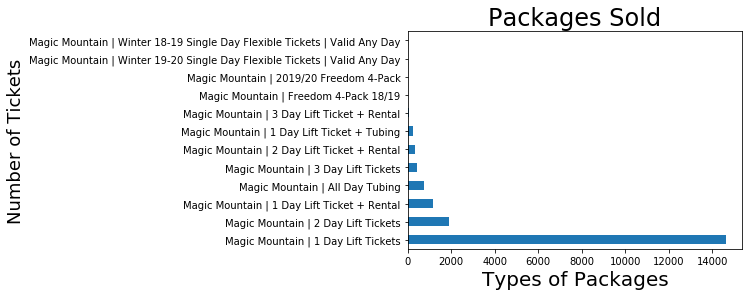

In [71]:
# Get a visual
df['product'].value_counts().plot(kind="barh")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Packages", fontsize=20)
plt.title('Packages Sold', fontsize=24)
plt.show()

In [72]:
# Total number of rentals bought with tickets
rentals = df[(df['product'] == 'Magic Mountain | 1 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 2 Day Lift Ticket + Rental') |
             (df['product'] == 'Magic Mountain | 3 Day Lift Ticket + Rental')].count()

In [73]:
# Rentals as a percent
print("Total percent of online rentals bought", 
      round(rentals['product']/len(df['product'])*100,2),'%')

Total percent of online rentals bought 8.01 %


In [74]:
# Check out Ticket Types
df['ticket_type'].value_counts()

Adult             13873
Youth / Senior     4976
All Ages            761
4-Pack               67
Name: ticket_type, dtype: int64

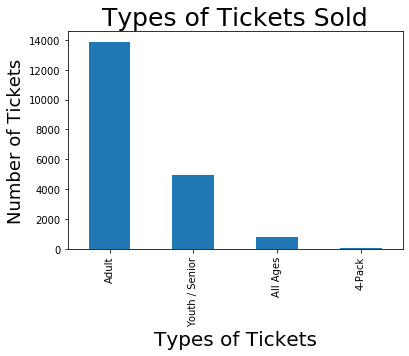

In [75]:
# Graph Ticket Types - looks like it's about 75% "Adult"
df['ticket_type'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Types of Tickets", fontsize=20)
plt.title('Types of Tickets Sold', fontsize=25)
plt.show()

## Ticket Time

#### Order Time

In [55]:
# Looks like MLK Weekend, Presidents Day Weekend, Feburary Break

#### Trip Time

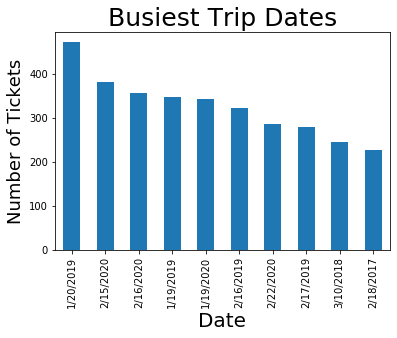

In [76]:
# What are the busiest dates?
df['trip_date'].value_counts()[0:10].plot(kind='bar')
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Date", fontsize=20)
plt.title('Busiest Trip Dates', fontsize=25)
plt.show()

#### Order Trip Time Difference

In [77]:
# Change date types to datetime %Y-%m-%d
df['order_date'] = pd.to_datetime(df['order_date'])
df['trip_date'] = pd.to_datetime(df['trip_date'])

In [78]:
# Create new column with the difference between order date and ticket date
df['order_to_trip_days'] = (df['trip_date'] - df['order_date']).dt.days

In [79]:
difference = df['order_to_trip_days']

In [80]:
# Look for three standard deviations above the mean
diff_outliers = difference.mean() + 3*difference.std()
# Count how many rows are outliers
print("Number of outliers:", (difference > diff_outliers).sum())
# Remove outliers from the data
difference = difference[difference < diff_outliers]
difference.describe()

Number of outliers: 492


count    19185.000000
mean         5.315559
std          8.102662
min          0.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         57.000000
Name: order_to_trip_days, dtype: float64

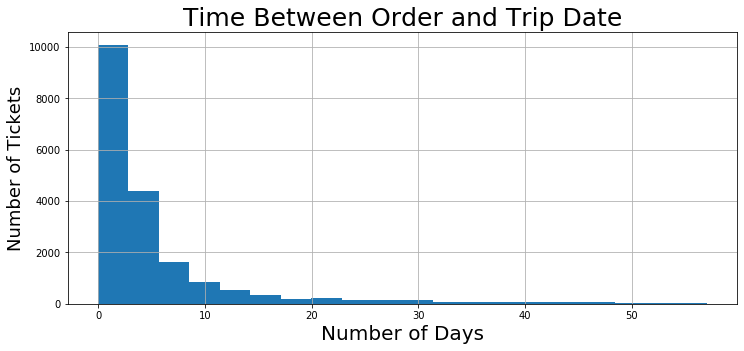

In [81]:
# Looks like most people buy tickets 1 or 2 days before they go skiing.
difference.hist(figsize =(12,5), bins=20)
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("Number of Days", fontsize=20)
plt.title('Time Between Order and Trip Date', fontsize=25)
plt.show()

In [66]:
# Perhaps I need to look at the difference of Liftopia vs Magic?

In [67]:
# Look at a map of distance from resort based on order_to_trip

## Zip Code

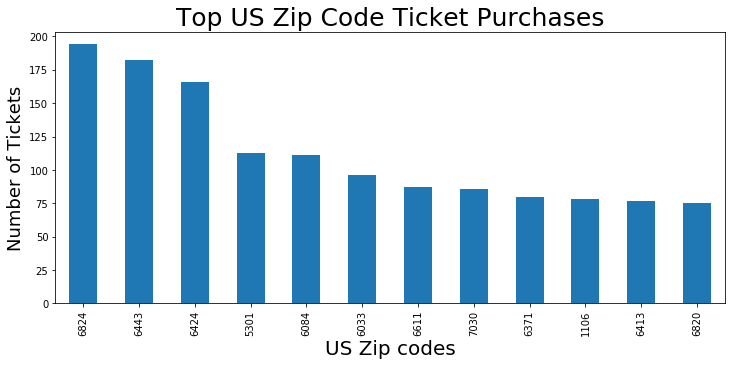

In [82]:
# Top ten zip codes where skiiers come from
df['purchaser_zip'].value_counts()[:12].plot(kind='bar',figsize =(12,5))
plt.ylabel("Number of Tickets",fontsize=18)
plt.xlabel("US Zip codes", fontsize=20)
plt.title('Top US Zip Code Ticket Purchases', fontsize=25)
plt.show()

In [83]:
# First I need to get rid of the NaN's
df.dropna(subset=['purchaser_zip'], inplace=True)

In [84]:
# Split the zip codes and get rid of the extra four digits
df['purchaser_zip'] = df['purchaser_zip'].map(lambda x: x.split('-')[0])

In [85]:
# # One of the random zip codes people entered!
df.replace(to_replace='O6073', value='06073', inplace=True)

In [86]:
# Another of the random zip codes people entered!
df.replace(to_replace='us, 05359', value='05359', inplace=True)

In [87]:
# Again of the random zip codes people entered!
df.replace(to_replace='us, 06489', value='06489', inplace=True)

In [88]:
# Another of the random zip codes people entered!
df.replace(to_replace='10506`\\', value='10506', inplace=True)

In [89]:
# Last one of the random zip codes people entered!
df.replace(to_replace='us, 12508', value='12508', inplace=True)

In [90]:
# Last one of the random zip codes people entered!
df.replace(to_replace='112384883', value='11238', inplace=True)

In [91]:
# Last one of the random zip codes people entered!
df.replace(to_replace='88763920', value='8876', inplace=True)

In [92]:
# Last one of the random zip codes people entered!
df.replace(to_replace='2039935884', value='06612', inplace=True)

In [93]:
# Last one of the random zip codes people entered!
df.replace(to_replace='111214', value='11214', inplace=True)

In [94]:
# Last one of the random zip codes people entered!
df.replace(to_replace='10604216', value='1060', inplace=True)

In [95]:
# Change the zip codes into integers
df.purchaser_zip = df.purchaser_zip.astype(int)

In [96]:
df.loc[df.purchaser_zip > 99999]

,order_id,order_status,product,ticket_type,store,order_date,trip_date,marketing_opt_in,purchaser_address,purchaser_city,purchaser_state,purchaser_zip,purchaser_country,net_rate_revenue,currency,order_to_trip_days


In [99]:
df.loc[df.purchaser_zip < 999]

,order_id,order_status,product,ticket_type,store,order_date,trip_date,marketing_opt_in,purchaser_address,purchaser_city,purchaser_state,purchaser_zip,purchaser_country,net_rate_revenue,currency,order_to_trip_days
626,10437576.0,PAID,Magic Mountain | 1 Day Lift Tickets,Adult,Magic Mountain,2017-01-29,2017-01-29,Yes,50 joghill rd,Trumbull,CT,661,US,53.94,USD,0
2122,10592117.0,PAID,Magic Mountain | 2 Day Lift Tickets,Youth / Senior,Magic Mountain,2017-02-22,2017-02-24,No,47 Cottage farms rd,Cape elizabeth,ME,47,US,58.58,USD,2
12533,12473498.0,PAID,Magic Mountain | 1 Day Lift Tickets,Adult,Magic Mountain,2019-02-18,2019-02-20,No,94 Merrill Ave,Lowell,MA,850,US,47.42,USD,2
12534,12473541.0,PAID,Magic Mountain | 1 Day Lift Tickets,Adult,Magic Mountain,2019-02-18,2019-02-20,No,94 Merrill Ave,Lowell,MA,850,US,49.28,USD,2
13715,12630004.0,PAID,Magic Mountain | 1 Day Lift Tickets,Adult,Liftopia.com,2019-03-08,2019-03-09,No,NaN,Wilton,NH,0,US,53.54,USD,1
16553,13576974.0,PAID,Magic Mountain | 2 Day Lift Tickets,Youth / Senior,Magic Mountain,2020-01-16,2020-01-18,No,47 Cottage farms rd,Cape elizabeth,ME,47,US,72.53,USD,2
18946,14008380.0,PAID,Magic Mountain | 1 Day Lift Tickets,Adult,Magic Mountain,2020-02-17,2020-02-19,No,94 Merrill Ave,Lowell,MA,850,US,46.49,USD,2


### Zip Code Map

In [26]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/

latlong_codes = pd.read_csv("Data_Folder/zip_code_database.csv")

In [27]:
# I just want the zipcodes and the lat/lon
latlong_codes = latlong_codes.filter(['zip','latitude', 'longitude'], axis=1)
latlong_codes.head()

,zip,latitude,longitude
0,501,40.81,-73.04
1,544,40.81,-73.04
2,601,18.16,-66.72
3,602,18.38,-67.18
4,603,18.43,-67.15


In [28]:
# Merge the lat and lon with my original dataframe
skiier_map = df.merge(latlong_codes, left_on='purchaser_zip', right_on='zip')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [103]:
# Create a new df with unique zip codes
df_zip = skiier_map.drop_duplicates(subset='purchaser_zip')

In [104]:
# How many different zip codes are there
df_zip.shape

(2387, 19)

#### All Unique Zip Code Map

In [105]:
# Find out where these zip codes are located
map_zipcodes = folium.Map([41.4090, -75.6624],zoom_start=6, min_zoom=6, 
                    width=800,height=600)

icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_zipcodes)

# Location by Zip code
for lat, lon in zip(df_zip['latitude'], df_zip['longitude']):
     folium.CircleMarker([lat, lon], radius=2, color='crimson',
    fill=False).add_to(map_zipcodes)

map_zipcodes

#### Heat Map

In [106]:
# Trying to look at a heat map of purchases based on zip code

from folium import plugins
from folium.plugins import HeatMap

# Find out where these zip codes are located
map_heat = folium.Map([42.3232, -72.6547],zoom_start=8, 
                    width=800,height=900)

# Fun Resort Icon
icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_heat)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skiier_map[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = skiier_map[['latitude', 'longitude']].values

# plot heatmap
map_heat .add_child(plugins.HeatMap(zipArr, radius=15))

map_heat 

#### Clustered Map

In [111]:
from folium import plugins
from folium.plugins import MarkerCluster

# Find out where these zip codes are located
map_cluster = folium.Map([40.7128, -74.0060], zoom_start=6, 
                         width=500, height=800)


icon = folium.features.CustomIcon('http://www.pngall.com/wp-content/uploads/2016/05/Skiing-PNG-HD.png',
                                  icon_size=(25,25))
folium.Marker([43.192778, -72.76],
              icon=icon, popup='Magic Mountain Resort',
              ).add_to(map_cluster)

# Convert to (n, 2) nd-array format for heatmap
#zipArr = skiier_map[['latitude', 'longitude']].as_matrix()

# Old method is depreciated, use this now
zipArr = df_zip[['latitude', 'longitude']].values

# plot cluster
map_cluster.add_child(plugins.MarkerCluster(zipArr, radius=15))

map_cluster

#### State Map - And Revenue?

In [104]:
skiiers_2017_zipcodes.purchaser_state.unique()

array(['CT', 'VT', 'PA', 'NJ', 'NY', 'MA', 'FL', 'MT', 'CA', 'NH', 'RI',
       'CO', 'NE', 'ID', 'VA', 'Other', 'NC', nan, 'MD', 'DE', 'AZ', 'OH',
       'IN', 'LA', 'ME', 'TX', 'MI', 'OR', 'GA'], dtype=object)

#### County Map

## Addresses

#### By city

In [112]:
df['purchaser_city'] = df['purchaser_city'].str.title()

#### By state

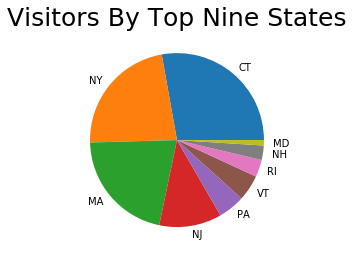

In [120]:
df.purchaser_state.value_counts()[0:9].plot(kind='pie')
plt.ylabel("",fontsize=18)
plt.title('Visitors By Top Nine States', fontsize=25)
plt.show()

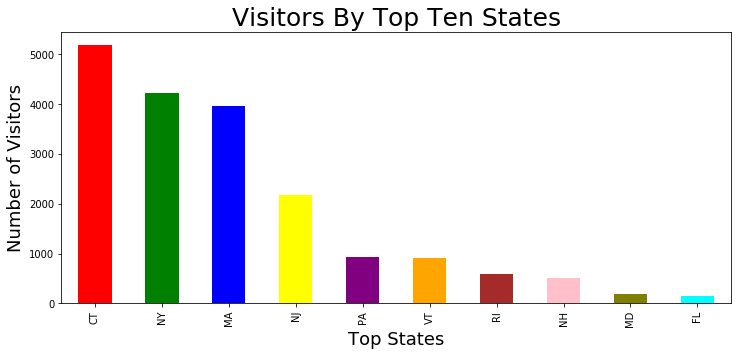

In [118]:
#my_colors = list('rgbkymc')  #red, green, blue, black, etc.
my_colors = list(['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'brown', 
                  'pink', 'olive', 'cyan'])
df.purchaser_state.value_counts()[0:10].plot(kind='bar',color=my_colors,figsize=(12,5))
plt.xlabel("Top States",fontsize=18)
plt.ylabel("Number of Visitors", fontsize=18)
plt.title('Visitors By Top Ten States', fontsize=25)
plt.show()

In [119]:
# Zip code info from zipcode database
# https://www.unitedstateszipcodes.org/zip-code-database/

state_codes = pd.read_csv("Data_Folder/zip_code_database.csv")

In [120]:
# I just want the zipcodes and the lat/lon
state_codes = state_codes.filter(['zip', 'primary_city', 'state', 'latitude',
                                  'longitude'], axis=1)

In [121]:
# Merge the lat and lon with my original dataframe
df_skiiers = df.merge(state_codes, left_on='purchaser_zip', right_on='zip')

In [122]:
df_skiiers = df_skiiers.drop(['order_status', 'marketing_opt_in', 'purchaser_country',
                              'currency'], axis=1)

In [124]:
df.purchaser_state.fillna(df_skiiers.state, inplace=True)

#### By address

In [127]:
# Missing a lot of data here... Maybe Liftopia doesn't require an address?
df.purchaser_address.count()

14111

In [128]:
df.store.value_counts()

Magic Mountain    14113
Liftopia.com       5559
Name: store, dtype: int64

In [129]:
# Are these repeat buyers or are they group purchases?
df.purchaser_address.value_counts()

733 PROSPECT ST              33
8 Kane Road                  28
136 Rhodes Road              25
456 Jones Hollow Road        23
209 old kings hwy North      22
                             ..
530                           1
42-20 24th Street Apt 15H     1
49 Hereford Street            1
15-1 Tantummaheag Rd          1
36 Journey Ln.                1
Name: purchaser_address, Length: 5802, dtype: int64

In [130]:
df.purchaser_address.value_counts().median()

2.0

In [131]:
df.purchaser_address.value_counts().mean()

2.432092381937263

#### Revenue

In [132]:
liftopia = df[df.store == 'Liftopia.com']

In [133]:
magic = df[df.store == 'Magic Mountain']

## Sales By Year

In [149]:
# Trying to seperate by year - NOT WORKING!
#df['2017'] = df[df['trip_date'] == '2017']

In [150]:
years = [df_2017.shape, df_2018.shape, df_2019.shape, df_2020.shape]

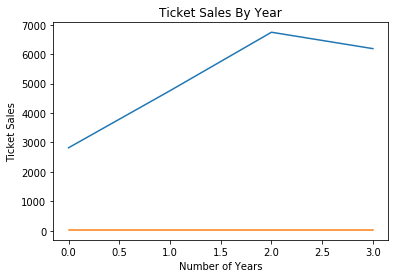

In [151]:
import matplotlib.pyplot as plt
plt.plot(years)
plt.xlabel('Number of Years')
plt.ylabel('Ticket Sales')
plt.title('Ticket Sales By Year')
plt.show()

# Models

## Grouped by Address

I would group each order by address and make features like number of tickets purchases, number of adult tickets purchased, number of child tickets purchased, etc

In [23]:
df.purchaser_address.value_counts()

733 PROSPECT ST            33
8 Kane Road                28
136 Rhodes Road            25
456 Jones Hollow Road      23
209 old kings hwy North    22
                           ..
180 Prindle Ave             1
26 Smith Lane               1
59 Hidden Glen Drive        1
17 Maplewood Dr             1
17 ruby lane                1
Name: purchaser_address, Length: 5842, dtype: int64

In [22]:
repeat_customers = df.groupby('purchaser_address')['trip_date'].nunique()
repeat_customers = pd.DataFrame(repeat_customers)

In [10]:
pip install geopy

     |████████████████████████████████| 112kB 1.3MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import geopy.distance

In [18]:
coords_1 = (43.192778, -72.76)
coords_2 = (42.6526, -73.7562)

print(geopy.distance.distance(coords_1, coords_2).miles)

62.804211106074305


In [24]:
skiier_map.head()

NameError: name 'skiier_map' is not defined

# Summary

# Future Recommendations